<a href="https://colab.research.google.com/github/eduardamota/curso-eba/blob/main/conceitos_estatistica_descritiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tipos de Dados

**Númericos**
  - Dicretos: Número de filhos, de casas (podemos resumir também como dados que só podem ser inteiros e finitos)
  - Contínuos: Salário, altura (são números decimais, não são contáveis...)

**Categóricos**
  - Nominal: Profissão,sexo (não tem ordem)
  - Ordinal: Escolaridade, ranking (tem uma ordem)


**Representação de dados:** Categóricos de discretos
- Tabelas de Frequência
- Gráficos de barra


**Representação de dados:** Categóricos de discretos
- Discretização: Quando temos muitas possibilidades a gente divide por classes
- Histograma

**Outliers**: Valores atípicos

# Medidas de Tendência Central
Valor que tenta descrever um conjunto de dados identificando sua posição central.
- Média Aritmética
- Mediana
- Moda
- Média Ponderada

# Quartil e Percentil

- Quartis: Dividem um conjunto de dados em quatro partes iguais
- Percentil: É o percentual de dados que contém em um determinado intervalo

  ### Boxplot
  Fornece uma análise visual da posição, dispersão, simetria, caudas e outliers dos dados.
  - **Cálculo de outliers:**
    - Limite Inferior = Q1 - 1.5 * (Q3 - Q1)
    - Limite Superior = Q3 - 1.5 * (Q3 - Q1)

# Medidas de dispersão
- **Amplitude**: Valor máximo - valor mínimo
- **Desvio Padrão**: É uma medida de dispersão em torno da média, desvio padrão alto indica que os pontos dos dados estão espalhados entre vários valores. Ou seja, dado nossa média o desvio padrão vai dizer quão distante está os demais dados da média.
 $$ σ = \sqrt{∑ (𝘟i - 𝜇)^2 / N}$$
- Coeficiente de Variação: Ele vai dizer quão representativo é o desvio padrão
  - CV = σ/𝜇

# SKEW
A assimetria (skew) é uma medida da assimetria da distribuição de probabilidade de uma variável aleatória avaliada em relação a sua média. Ela pode ser positiva, zero, negativo ou indefinido.

# Curtose
Vai demonstrar o achatamento da nossa curva, ela não vai medir o pico, mas sim o peso das caudas.

# Resistência dos Dados
Dizemos que uma medida de localização ou dispersão é resistente quando ela é pouco afetada por mudanças de uma pequena porção dos dados. A mediana é uma medida resistente, já a média não é.



**Problema:** Um analista de dados contratado de uma rede imobiliária dos EUA recebeu uma base de dados que contém casa vendidas. A sua missão é usando apenas estatística descritiva, entender como os dados se comportam e entender algumas variáveis que podem impactar no preço dessas casas.


In [2]:
#Imports
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('house_price.csv')

In [6]:
df.head()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Unnamed: 0    1460 non-null   int64 
 1   SalePrice     1460 non-null   int64 
 2   OverallQual   1460 non-null   int64 
 3   OverallCond   1460 non-null   int64 
 4   BedroomAbvGr  1460 non-null   int64 
 5   TotRmsAbvGrd  1460 non-null   int64 
 6   GrLivArea     1460 non-null   int64 
 7   TotalBsmtSF   1460 non-null   int64 
 8   YearBuilt     1460 non-null   int64 
 9   MSZoning      1460 non-null   object
 10  Utilities     1460 non-null   object
 11  BldgType      1460 non-null   object
dtypes: int64(9), object(3)
memory usage: 137.0+ KB


Avaliando se tenho valores nulos no meu dataframa

In [10]:
df.isnull().sum()

Unnamed: 0      0
SalePrice       0
OverallQual     0
OverallCond     0
BedroomAbvGr    0
TotRmsAbvGrd    0
GrLivArea       0
TotalBsmtSF     0
YearBuilt       0
MSZoning        0
Utilities       0
BldgType        0
dtype: int64

In [16]:
#Utilizando algumas estatísticas descritivas
mean = df['SalePrice'].mean()
median = df['SalePrice'].median()
mode = df['SalePrice'].mode()
print(f"mean: {mean}\nmedian: {median}\nmode: {mode}")


mean: 180921.19589041095
median: 163000.0
mode: 0    140000
Name: SalePrice, dtype: int64


<Axes: xlabel='SalePrice'>

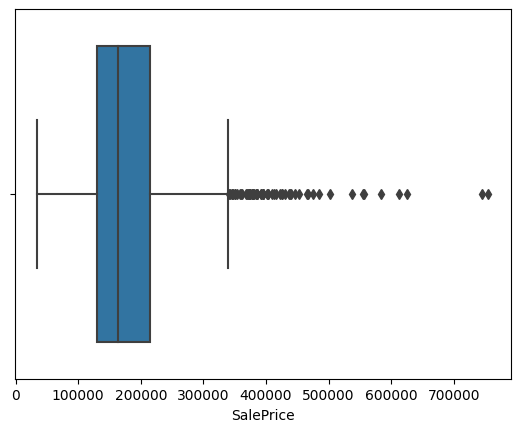

In [19]:
#Plotando o bloxplot
sns.boxplot(x=df.SalePrice)

Vemos que temos outliers que estão puxando a média pra cima

In [20]:
df.SalePrice.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

# **Hipóteses**

> ### Numéricas:
- A média/mediana da qualidade do imóvel é maior para apartamentos mais caros
- A média/mediana da quantidade de quartos/área/comodos/banheiros é maior para apartamentos mais caros
- Apartamentos mais caros são mais antigos

> ### Contínuas:
- Há uma diferença no valor dos imóveis de acordo com a localização
- As utilidades da casa influenciam o preço
- O tipo de habitação influencia o preço




In [21]:
df.describe()

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,729.500000,180921.195890,6.099315,5.575342,2.866438,6.517808,1515.463699,1057.429452,1971.267808
std,421.610009,79442.502883,1.382997,1.112799,0.815778,1.625393,525.480383,438.705324,30.202904
min,0.000000,34900.000000,1.000000,1.000000,0.000000,2.000000,334.000000,0.000000,1872.000000
25%,364.750000,129975.000000,5.000000,5.000000,2.000000,5.000000,1129.500000,795.750000,1954.000000
50%,729.500000,163000.000000,6.000000,5.000000,3.000000,6.000000,1464.000000,991.500000,1973.000000
75%,1094.250000,214000.000000,7.000000,6.000000,3.000000,7.000000,1776.750000,1298.250000,2000.000000
max,1459.000000,755000.000000,10.000000,9.000000,8.000000,14.000000,5642.000000,6110.000000,2010.000000


In [23]:
df['categoria_preco'] =  np.where(df['SalePrice']>214000,"cara","barata")
df

,Unnamed: 0,SalePrice,OverallQual,OverallCond,BedroomAbvGr,TotRmsAbvGrd,GrLivArea,TotalBsmtSF,YearBuilt,MSZoning,Utilities,BldgType,categoria_preco
0,0,208500,7,5,3,8,1710,856,2003,RL,AllPub,1Fam,barata
1,1,181500,6,8,3,6,1262,1262,1976,RL,AllPub,1Fam,barata
2,2,223500,7,5,3,6,1786,920,2001,RL,AllPub,1Fam,cara
3,3,140000,7,5,3,7,1717,756,1915,RL,AllPub,1Fam,barata
4,4,250000,8,5,4,9,2198,1145,2000,RL,AllPub,1Fam,cara
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1455,175000,6,5,3,7,1647,953,1999,RL,AllPub,1Fam,barata
1456,1456,210000,6,6,3,7,2073,1542,1978,RL,AllPub,1Fam,barata
1457,1457,266500,7,9,4,9,2340,1152,1941,RL,AllPub,1Fam,cara
1458,1458,142125,5,6,2,5,1078,1078,1950,RL,AllPub,1Fam,barata


media: categoria_preco
barata    5.588342
cara      7.649171
Name: OverallQual, dtype: float64
mediana: categoria_preco
barata    6.0
cara      8.0
Name: OverallQual, dtype: float64


Text(0, 0.5, 'Qualidade Geral')

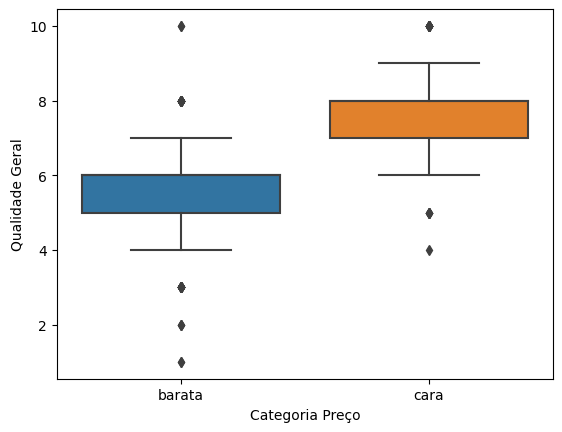

In [34]:
#Criando um boxplot para analisar a categoria por Qualidade
fig = sns.boxplot(x="categoria_preco", y="OverallQual", data = df)
print("media:", df.groupby("categoria_preco")["OverallQual"].mean())
print("mediana:", df.groupby("categoria_preco")["OverallQual"].median())
fig.set_xlabel("Categoria Preço")
fig.set_ylabel("Qualidade Geral")


Conseguimos enxergar que temos um overlap entre as casas baratas e as casas caras entre (***6.5 - 6***). Além disso, os outliers das casas caras coincidem também com o limite inferior das casas baratas (***4.5 - 4***). Logo, ainda não conseguimos ter uma afirmação acertiva de que as casas caras tem qualidade superior as baratas, para isso, precisaríamos usar um teste de hipótese.

media: categoria_preco
barata    5.631148
cara      5.406077
Name: OverallCond, dtype: float64
mediana: categoria_preco
barata    5.0
cara      5.0
Name: OverallCond, dtype: float64


Text(0, 0.5, 'Condição Geral')

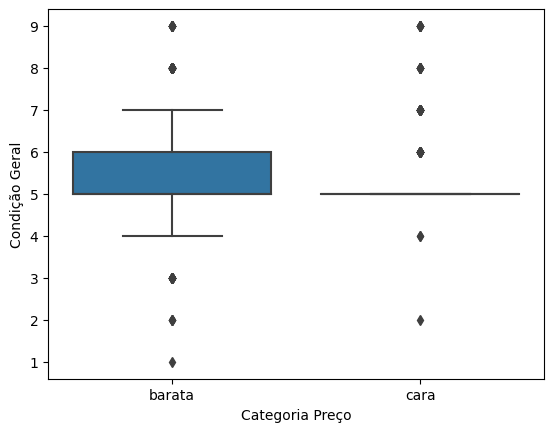

In [35]:
#Criando um boxplot para analisar a condição geral da casa por categoria
fig = sns.boxplot(x="categoria_preco", y="OverallCond", data = df)
print("media:", df.groupby("categoria_preco")["OverallCond"].mean())
print("mediana:", df.groupby("categoria_preco")["OverallCond"].median())
fig.set_xlabel("Categoria Preço")
fig.set_ylabel("Condição Geral")

In [36]:
#Fazendo um deep dive por categoria cara
df[df.categoria_preco=="cara"][["categoria_preco","OverallCond"]]

,categoria_preco,OverallCond
2,cara,5
4,cara,5
6,cara,5
11,cara,5
13,cara,5
...,...,...
1437,cara,5
1442,cara,5
1447,cara,5
1451,cara,5


In [37]:
#Vamos contar as notas
df[df.categoria_preco=="cara"].OverallCond.value_counts()

5    284
7     32
6     25
8      9
9      9
4      2
2      1
Name: OverallCond, dtype: int64

In [38]:
df[df.categoria_preco=="barata"].OverallCond.value_counts()

5    537
6    227
7    173
8     63
4     55
3     25
9     13
2      4
1      1
Name: OverallCond, dtype: int64

Vimos aqui que temos uma aleatoriedade grande quando falamos das casas caras, nossa impressão é que o pessoal atribiu notas aleatórias nessa casa. Isso dificulta a análise que está sendo realizada, dado que não vamos ter uma afirmação concreta sobre esses dados.

media: categoria_preco
barata    6.122951
cara      7.715470
Name: TotRmsAbvGrd, dtype: float64
mediana: categoria_preco
barata    6.0
cara      8.0
Name: TotRmsAbvGrd, dtype: float64


Text(0, 0.5, 'Volume de Comodos')

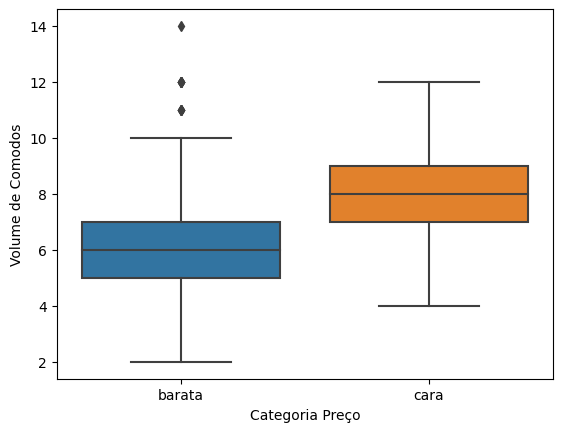

In [41]:
#Vamos analisar agora o volume de comodos com base nas categorias
fig = sns.boxplot(x="categoria_preco", y= "TotRmsAbvGrd", data=df)
print("media:", df.groupby('categoria_preco')['TotRmsAbvGrd'].mean())
print("mediana:", df.groupby('categoria_preco')['TotRmsAbvGrd'].median())
fig.set_xlabel("Categoria Preço")
fig.set_ylabel("Volume de Comodos")

Vemos também aqui que temos um overlap entre as casas caras e as baratas.

media: categoria_preco
barata    1342.642077
cara      2039.657459
Name: GrLivArea, dtype: float64
mediana: categoria_preco
barata    1308.5
cara      1956.0
Name: GrLivArea, dtype: float64


Text(0, 0.5, 'Área das Casas')

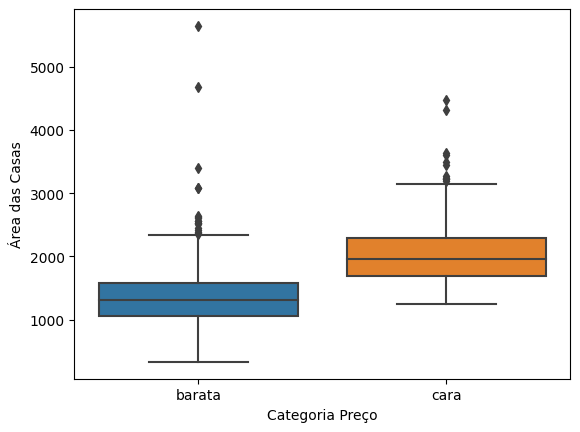

In [43]:
#Vamos analisar agora a area com base nas categorias
fig = sns.boxplot(x="categoria_preco", y= "GrLivArea", data=df)
print("media:", df.groupby('categoria_preco')['GrLivArea'].mean())
print("mediana:", df.groupby('categoria_preco')['GrLivArea'].median())
fig.set_xlabel("Categoria Preço")
fig.set_ylabel("Área das Casas")

media: categoria_preco
barata     936.475410
cara      1424.301105
Name: TotalBsmtSF, dtype: float64
mediana: categoria_preco
barata     912.0
cara      1452.5
Name: TotalBsmtSF, dtype: float64


Text(0, 0.5, 'Total de Área do Porão')

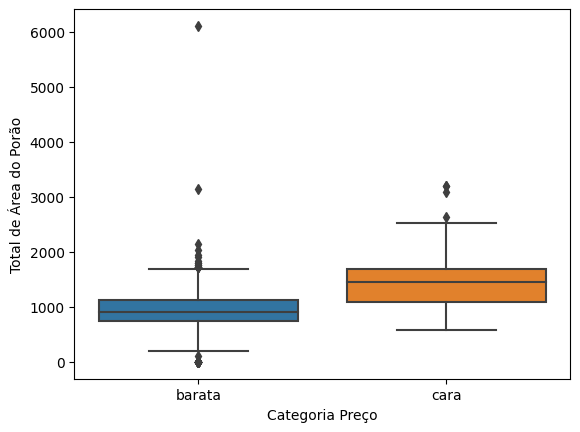

In [44]:
#Vamos analisar agora total de area do porão com base nas categorias
fig = sns.boxplot(x="categoria_preco", y= "TotalBsmtSF", data=df)
print("media:", df.groupby('categoria_preco')['TotalBsmtSF'].mean())
print("mediana:", df.groupby('categoria_preco')['TotalBsmtSF'].median())
fig.set_xlabel("Categoria Preço")
fig.set_ylabel("Total de Área do Porão")

media: categoria_preco
barata    1964.303279
cara      1992.392265
Name: YearBuilt, dtype: float64
mediana: categoria_preco
barata    1965.5
cara      2002.0
Name: YearBuilt, dtype: float64


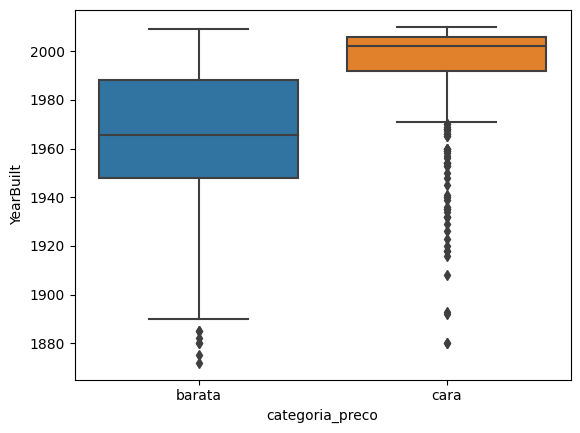

In [45]:
#Vamos analisar agora ano de construção com base nas categorias
fig = sns.boxplot(x="categoria_preco",y="YearBuilt",data=df)
print("media:", df.groupby("categoria_preco")["YearBuilt"].mean())
print("mediana:", df.groupby("categoria_preco")["YearBuilt"].median())

# **Correlação**
Uma variável é considerada correlacionada com outra quando existe uma relação consistente entre suas mudanças. Isso significa que, se uma variável aumenta e a outra também aumenta, ou se uma diminui enquanto a outra também diminui, elas são ditas positivamente correlacionadas. Por outro lado, se uma variável aumenta enquanto a outra diminui, ou vice-versa, elas são negativamente correlacionadas. Em resumo, correlação indica uma relação previsível entre as variações de duas variáveis.

<Axes: xlabel='SalePrice', ylabel='OverallQual'>

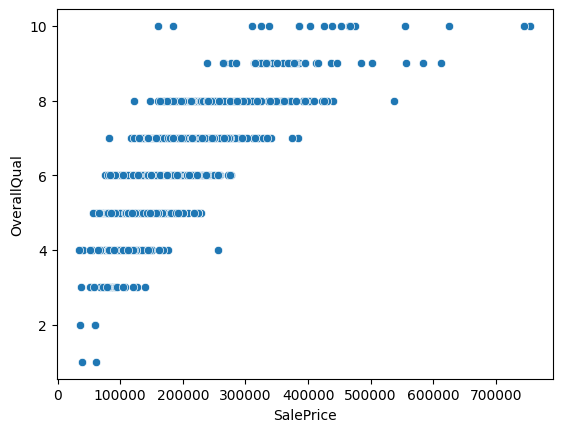

In [46]:
sns.scatterplot(x= "SalePrice", y="OverallQual", data=df)


<Axes: xlabel='SalePrice', ylabel='GrLivArea'>

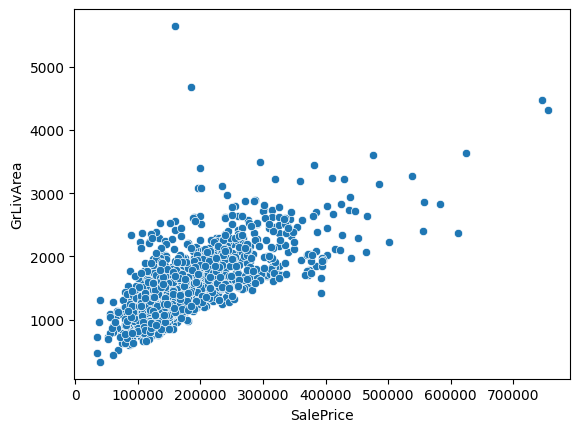

In [47]:
sns.scatterplot(x= "SalePrice", y="GrLivArea", data=df)

<Axes: xlabel='SalePrice', ylabel='YearBuilt'>

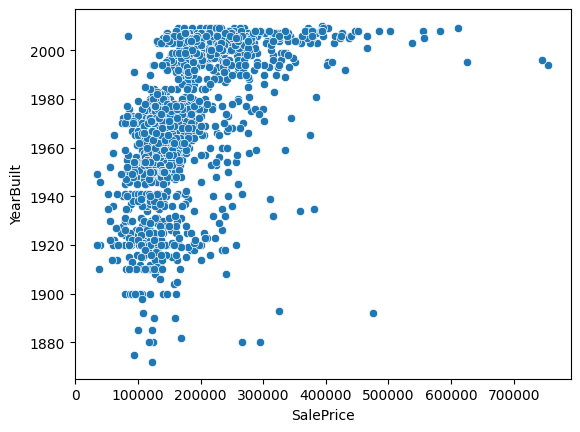

In [48]:
sns.scatterplot(x= "SalePrice", y="YearBuilt", data=df)

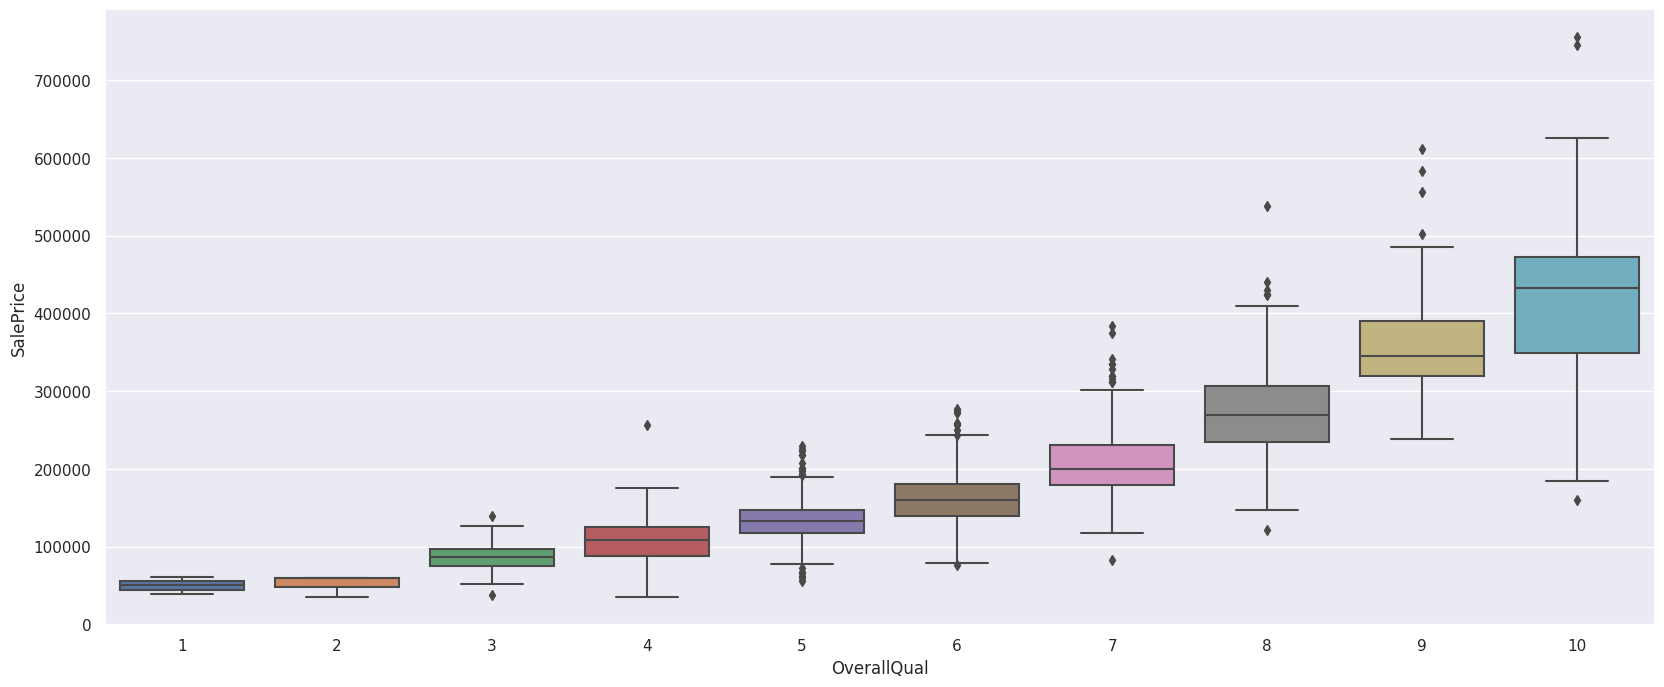

In [52]:
#Qualidade
sns.set(rc= {'figure.figsize': (20,8)})
fig = sns.boxplot(x="OverallQual",y="SalePrice", data=df)


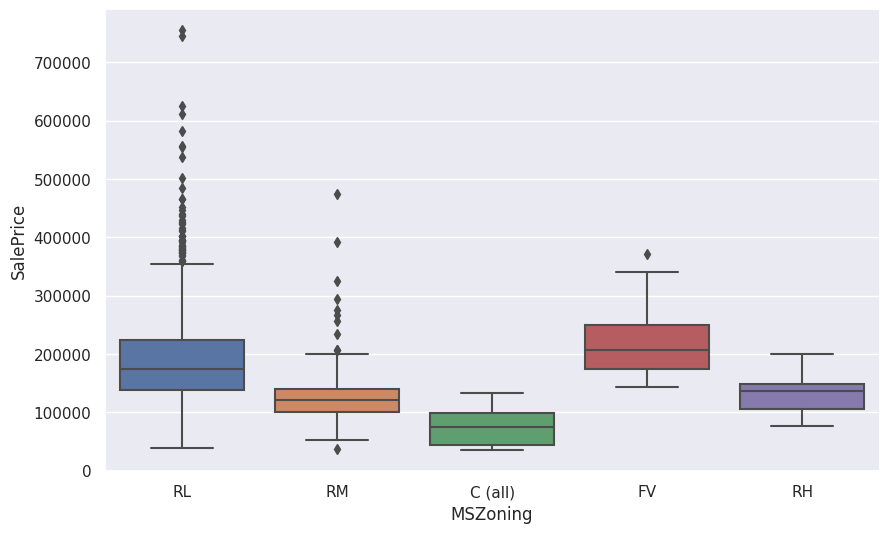

In [62]:
#Analisando as categóricas
#MSZoning
plt.figure(figsize=(10, 6))
fig = sns.boxplot(x="MSZoning",y="SalePrice", data=df)

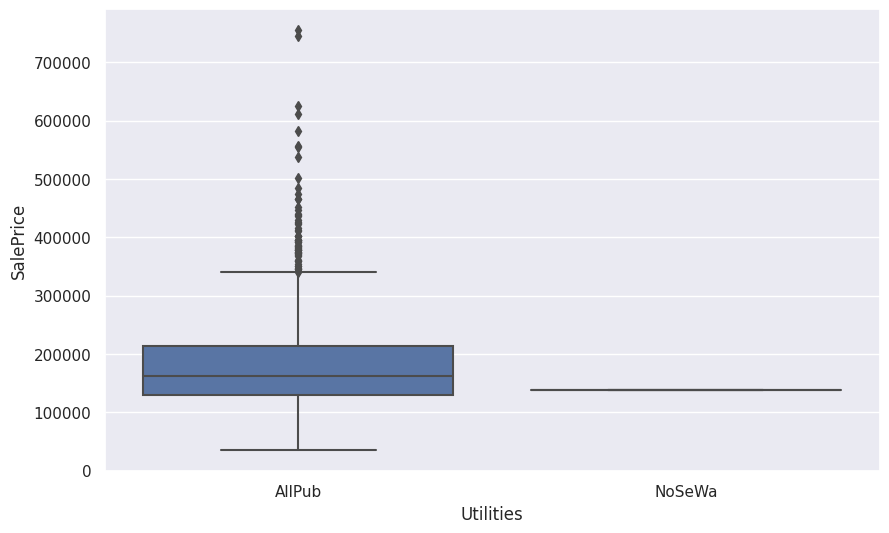

In [58]:
#Utilities
plt.figure(figsize=(10, 6))
fig = sns.boxplot(x="Utilities",y="SalePrice", data=df)


In [64]:
df['Utilities'].value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

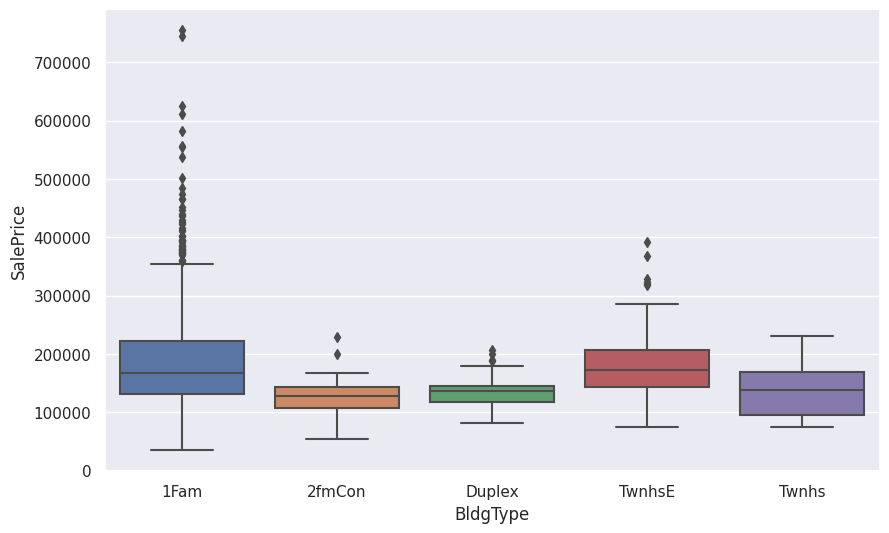

In [61]:
#BldgType
plt.figure(figsize=(10, 6))
fig = sns.boxplot(x="BldgType",y="SalePrice", data=df)

(array([ 22., 126., 380., 343., 229., 144.,  86.,  49.,  28.,  23.,  12.,
          7.,   3.,   1.,   2.,   1.,   2.,   0.,   0.,   2.]),
 array([ 34900.,  70905., 106910., 142915., 178920., 214925., 250930.,
        286935., 322940., 358945., 394950., 430955., 466960., 502965.,
        538970., 574975., 610980., 646985., 682990., 718995., 755000.]),
 <BarContainer object of 20 artists>)

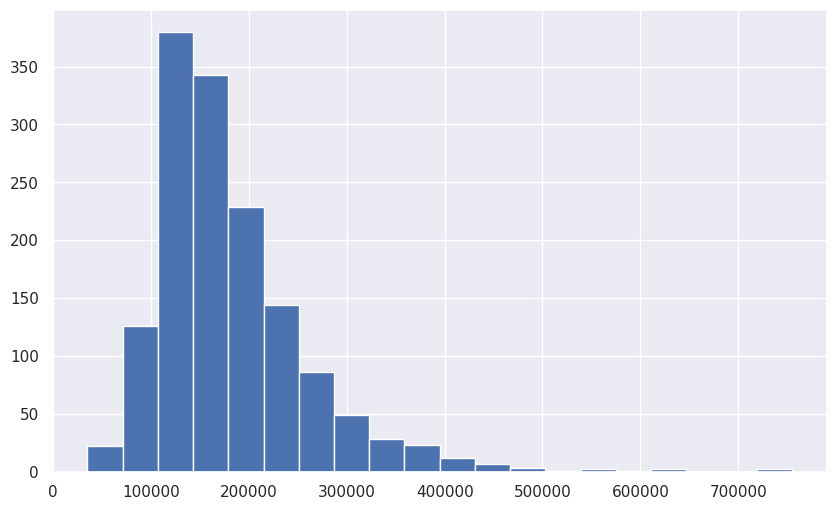

In [67]:
#SalePrice
plt.figure(figsize=(10,6))
plt.hist(df['SalePrice'], bins =20)

In [69]:
#Calculando o desvio
desvio = df['SalePrice'].std()
desvio

79442.50288288662

In [71]:
coef_var = (desvio/df['SalePrice'].mean())*100
coef_var

43.91000318780071

Vemos que o desvio representa 43,9% da nossa média, logo vemos que temos uma variabilidade grande em torno da média.

In [72]:
#Calculando o skew
from scipy.stats import skew
skew(df['SalePrice'])

1.880940746034036

Temos uma skew maior que 1, ou seja, os nossos dados não segue uma distribuição normal. Vemos também que temos uma skew positiva para direita, temos uma cauda para direita.